## 4.8 다중클래스 데이터의 시각화

In [3]:
import tensorflow as tf
import numpy as np # NumPy와 matplotlib을 불러옵니다
import matplotlib.pyplot as plt

In [4]:
x1_label0 = np.random.normal(1, 1, (100, 1)) # (1, 1) 근처에 점들을 생성합니다
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1)) # (5, 4) 근처에 점들을 생성합니다
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1)) # (8, 0) 근처에 점들을 생성합니다
x2_label2 = np.random.normal(0, 1, (100, 1))

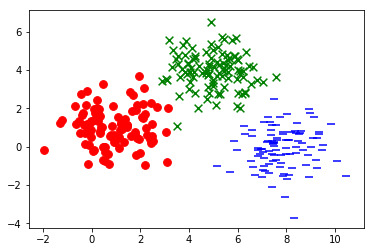

In [5]:
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60) # 3개의 레이블을 산포도로 시각화합니다
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

## 4.9 다중 클래스 분류를 위한 학습 데이터와 테스트 데이터 설정

In [6]:
xs_label0 = np.hstack((x1_label0, x2_label0)) # 모든 입력 데이터를 하나의 큰 행렬로 조합합니다
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))

labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2)) # 원핫 레이블을 생성합니다

arr = np.arange(xs.shape[0]) # 데이터셋을 섞어줍니다
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

test_x1_label0 = np.random.normal(1, 1, (10, 1)) # 테스트 데이터셋과 레이블을 구성합니다
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

train_size, num_features = xs.shape # 데이터셋의 형태를 통해 데이터의 수와 데이터 별 피쳐의 수를 알 수 있습니다

## 4.10 소프트맥스 회귀 사용하기

In [7]:
learning_rate = 0.01 # 하이퍼파라미터를 정의합니다
training_epochs = 1000
num_labels = 3
batch_size = 100

X = tf.placeholder("float", shape=[None, num_features]) # 입력/출력 플레이스홀더 노드를 정의합니다
Y = tf.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels])) # 모델 파라미터를 정의합니다
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b) # 소프트맥스 모델을 디자인합니다

cost = -tf.reduce_sum(Y * tf.log(y_model)) # 학습 알고리즘을 설정합니다
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1)) # 성공율을 측정할 연산을 정의합니다
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

## 4.11 그래프 실행하기

In [8]:
with tf.Session() as sess: # 새로운 세션을 열고 모든 변수를 초기화합니다
    tf.global_variables_initializer().run()
    
    for step in range(training_epochs * train_size // batch_size): # 데이터셋을 한번 돌 만큼 반복합니다
        offset = (step * batch_size) % train_size # 현재의 배치 (batch) 에 따른 데이터셋 부분에 대해 수행합니다
        batch_xs = xs[offset: (offset + batch_size), :]
        batch_labels = labels[offset: (offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels}) # 이 배치에 대해 최적화기를 실행합니다
        if step % 100 == 0: # 결과를 출력해 줍니다
            print(step, err)
            
    W_val = sess.run(W) # 최종 학습 파라미터를 출력합니다
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels})) # 성공율을 출력합니다

0 109.86123
100 8.332103
200 4.032568
300 4.3345375
400 4.7097325
500 2.6960976
600 3.5268257
700 3.8269508
800 2.250238
900 3.0878446
1000 3.3409193
1100 2.0098712
1200 2.7857225
1300 3.0122564
1400 1.8561938
1500 2.5568998
1600 2.7667878
1700 1.7483873
1800 2.3747618
1900 2.572531
2000 1.6680377
2100 2.2252743
2200 2.4129002
2300 1.6055013
2400 2.0999496
2500 2.2782245
2600 1.5551987
2700 1.993162
2800 2.1623614
2900 1.5136794
w [[-2.8722188   0.5088721   2.36335   ]
 [ 0.08900784  1.8130009  -1.9020085 ]]
b [11.106531 -3.377968 -7.728552]
accuracy 1.0
